<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Introduction au Deep Learning avec Keras</h1></center>
<center><h2>Résolution avec l'architecture LeNet</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">



## Contexte et objectif

>Le principal objectif de l'exercice est de réaliser une reproduction de l'algorithme de Réseau de Neurones Convolutif **LeNet5**  sur Python avec le module Keras. Plus d'infos sur LeNet [ici](http://yann.lecun.com/exdb/lenet/).
>
>
>
>L’architecture LeNet a été introduite par Yann LeCun en Novembre 1998 dans le journal [*Proceedings of the IEEE*](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf).
> Nous allons reconstruire l'architecture du réseau LeNet qui est plus élaborée que celle créée dans l’exercice précédent. Le réseau LeNet comprend notamment deux couches de convolution, deux couches de *pooling*, ainsi que des layers de *dropout*.

* Exécutez la cellule ci-dessous pour importer les modules nécessaires à l'exercice.

In [1]:
%matplotlib inline
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import metrics

import itertools

Using TensorFlow backend.


* Exécutant la cellule suivante pour charger les données obtenues à l'Exercice 1.

In [2]:
# Pour importer le datasets mnist de Keras
from keras.datasets.mnist import load_data

# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = load_data()

# Changer la forme de X_train et X_test
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:',y_train.shape)

Shape of X: (60000, 784)
Shape of y: (60000,)


* Transformer les données **X_train** en un tableau à 4 dimensions (nb_images, largeur, hauteur, profondeur). Chacune des images sera ainsi redimensionnée au format (28, 28, 1).


* Faire de même pour les données **X_test**.

* Diviser les pixels des données **X_train** et **X_test** par 255 afin qu'ils soient compris entre 0 et 1.


* Transformer les labels de **y_train** et **y_test** en vecteurs catégorielles binaires (*one hot*), grâce à la fonction `to_categorical` du sous-module **np_utils** de **keras**.

> L'architecture du LeNet est constituée des couches suivantes:
>> * **Convolution 1** : 30 filtres,  dimension d'entrée (28, 28, 1), dimension du noyau (5, 5), fonction d'activation *ReLU*, pas de dépassement du noyau.
>> * **Max-Pooling 1** : dimension du pooling (2, 2).
>>
>> * **Convolution 2** : 16 filtres, dimension du noyau (3, 3), fonction d'activation *ReLU*, Pas de dépassement du noyau.
>> * **Max-Pooling 2** : dimension du pooling (2, 2).
>>
>> * **Dropout** : Connexions coupées: 20%.
>> * **Aplatissement**
>> * **Dense 1** : 128 neurones, fonction d'activation *ReLU*.
>> * **Dense 2** :  10 neurones, fonction d'activation *softmax*.
>
>  En image: <img src="https://datascientest.fr/train/assets/le_net.png" style="width:auto; height:200px" />

* Instancier l'ensemble de ces couches et les ajouter à un modèle séquentiel.


* Compiler le modèle avec la fonction de perte *'categorical_crossentropy'*, l'optimiseur *'adam'* et la métrique *["accuracy"]*.


* Entraîner le modèle avec les données d'entraînement sur 16 *epochs* avec des *batchs* de taille 200 et un *split* de validation de 0,2. Stocker la sortie de l'entraînement dans une variable nommée **training_history_lenet**.



* Lancer la cellule suivante pour extraire de **training_history_lenet** les précisions sur les bases d'entraînement et de validation obtenues pendant l'entraînement.

In [6]:
train_acc_lenet = training_history_lenet.history['accuracy']
val_acc_lenet = training_history_lenet.history['val_accuracy']

> Nous voulons comparer les trois réseaux que nous avons construits jusqu'à maintenant: le réseau dense, le CNN et LeNet.

* Lancer la cellule suivante pour instancier, compiler et entraîner les modèles des exercices précédents. L'opération peut prendre quelques minutes.

In [7]:
# Réseau Dense

dense = Sequential()
dense_0 = Flatten()
dense_1 = Dense(units = 20, input_dim = 784, kernel_initializer ='normal', activation ='tanh')            
dense_2 = Dense(units = 10, kernel_initializer ='normal', activation ='softmax')
dense.add(dense_0)
dense.add(dense_1)
dense.add(dense_2)

# CNN

cnn = Sequential()
cnn_1 = Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', input_shape = (28, 28, 1), activation = 'relu')
cnn_2 = MaxPooling2D(pool_size = (2, 2))
cnn_3 = Dropout(rate = 0.2)
cnn_4 = Flatten()
cnn_5 = Dense(units = 128, activation = 'relu')
cnn_6 = Dense(units = 10, activation='softmax')

cnn.add(cnn_1)
cnn.add(cnn_2)
cnn.add(cnn_3)
cnn.add(cnn_4)
cnn.add(cnn_5)
cnn.add(cnn_6)

# Compilation
dense.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])           
cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])            

# Entraînement
training_history_dense = dense.fit(X_train, y_train, validation_split = 0.2, epochs = 16, batch_size = 200, verbose = 1)
training_history_cnn = cnn.fit(X_train, y_train, validation_split = 0.2, epochs = 16, batch_size = 200, verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/16
48000/48000 [==============================] - 1s 13us/step - loss: 1.2039 - accuracy: 0.7756 - val_loss: 0.5853 - val_accuracy: 0.8827
Epoch 2/16
48000/48000 [==============================] - 1s 11us/step - loss: 0.4746 - accuracy: 0.8923 - val_loss: 0.3678 - val_accuracy: 0.9089
Epoch 3/16
48000/48000 [==============================] - 1s 11us/step - loss: 0.3480 - accuracy: 0.9109 - val_loss: 0.3005 - val_accuracy: 0.9194
Epoch 4/16
48000/48000 [==============================] - 1s 11us/step - loss: 0.2947 - accuracy: 0.9207 - val_loss: 0.2683 - val_accuracy: 0.9264
Epoch 5/16
48000/48000 [==============================] - 1s 11us/step - loss: 0.2629 - accuracy: 0.9281 - val_loss: 0.2475 - val_accuracy: 0.9317
Epoch 6/16
48000/48000 [==============================] - 1s 11us/step - loss: 0.2404 - accuracy: 0.9336 - val_loss: 0.2327 - val_accuracy: 0.9369
Epoch 7/16
48000/48000 [==============================] - 1s 11us/st

> Nous avons stocké la sortie de leurs entraînements dans les variables **training_history_dense** et **training_history_cnn**.

* Extraire de ces deux dictionnaires les précisions sur la base de validation obtenues pendant l'entraînement de chacun des modèles.


* À l'aide du module *matplotlib.pyplot*, tracer les évolutions des précisions sur la base de validation des trois modèles. On rapelle que l'entraînement s'est fait sur *16 epochs* pour les trois modèles.


* Quel modèle vous paraît être le plus performant?

* Prédire les classes de l'échantillon **X_test** à l'aide de la méthode `predict` du modèle LeNet. Stocker le résultat dans un tableau nommé **test_pred_lenet**.


* Faire de même pour les deux autres modèles et stocker le résultat dans **test_pred_dense** et **test_pred_cnn**.


* Appliquer la méthode `argmax` sur les tableaux **test_pred_lenet**, **test_pred_dense**, **test_pred_cnn** et **y_test** pour obtenir des vecteurs d'entiers correspondant aux classes prédites et réelles. Il faudra passer l'argument '`axis = 1`' pour que l'argmax soit calculée sur les colonnes et non les lignes. Stocker les sorties des appels de la méthode `argmax` dans des tableaux nommés **test_pred_lenet_class**, **test_pred_dense_class**, **test_pred_cnn_class** et **y_test_class**.

* Afficher un compte-rendu évaluatif détaillé de la perfomance du modèle **lenet** à l'aide de la fonction `classification_report` du sous-module **metrics** de **scikit-learn**.

* Lancer la cellule suivante pour voir les images de la base de test où les trois modèles se sont trompés. Vous pouvez la relancer plusieurs fois.

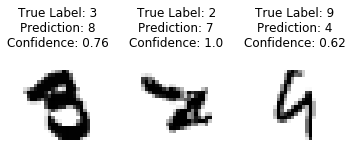

In [18]:
error_indexes = []
for i in range(len(test_pred_cnn)):
    if (test_pred_lenet_class[i] != y_test_class[i]):
        if(test_pred_dense_class[i] != y_test_class[i]):
            if(test_pred_cnn_class[i] != y_test_class[i]):
                error_indexes += [i]

j = 1
for i in np.random.choice(error_indexes, size = 3):
    img = X_test[i] 
    img = img.reshape(28, 28)
    
    plt.subplot(1, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img,cmap = cm.binary, interpolation='None')
    plt.title('True Label: ' + str(y_test_class[i]) \
              + '\n' + 'Prediction: '+ str(test_pred_lenet_class[i]) \
              + '\n' + 'Confidence: '+ str(round(test_pred_lenet[i][test_pred_lenet_class[i]], 2)))

> On remarque que certains des chiffres mal identifiés sont parfois très mal écrits, certains ne sont même pas reconnaissables.
>
> Avec un taux de précision dépassant les 99% pour quelques minutes d'entraînement, on peut affirmer qu'au moins un des trois modèles a rempli son objectif.

### Ce qu'il faut retenir : 


> Les réseaux de neurones construits séquentiellement sont des outils de machine learning désormais accessibles offrant des résultats pouvant surpasser de loin les algorithmes classiques sur des tâches non-triviales.
>
>Le schéma pour implémenter un modèle avec keras est très simple:
> * Architecture du modèle
> * Compilation du modèle
> * Entraînement du modèle
> * Diagnostique de l'entraînement
> * Evaluation des prédictions